In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Make Segmentation Figures

### Tiles

In [13]:
import cv2
import numpy
import os, sys, glob
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [28]:
imglist = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/xval_set_0_val/jpg/*jpg'))
gtlist = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/xval_set_0_val/mask/*png'))

fcn_512_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/analysis_fcn/xval_set_0_1024/*png'))
segnet_512_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/analysis_segnet/xval_set_0_1024/*png'))
segnet_basic_512_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/analysis_segnet_basic/xval_set_0_1024/*png'))

print len(imglist), len(gtlist), len(fcn_512_list), len(segnet_512_list), len(segnet_basic_512_list)

103 103 103 103 103


In [17]:
def colorize(mask):
    colors={
        0: [30, 30, 234],
        1: [63, 210, 68],
        2: [245, 25, 70],
        3: [210, 210, 210]
    }
    
    img = np.zeros_like(mask, dtype=np.uint8)
    img = np.dstack([img, img, img])
    
    for u in np.unique(mask):
        img[(mask == u), :] = colors[u]
        
    return img
    

In [29]:
outpath = '/Users/nathaning/Dropbox/_Papers/pca segmentation/Figs/tile_segmentations/xval_0_1024'
for imgp, gtp, fcnp, segnetp, segnetbp in zip(
    imglist, gtlist, fcn_512_list, segnet_512_list, segnet_basic_512_list):

#     imgp = imglist[0]
#     gtp = gtlist[0]
#     fcnp = fcn_512_list[0]
#     segnetp = segnet_512_list[0]
#     segnetbp = segnet_basic_512_list[0]
    img_base = os.path.basename(imgp)
    outfile = os.path.join(outpath, img_base.replace('.jpg', '.png'))

    img = cv2.imread(imgp)[:,:,::-1]
    gt = cv2.imread(gtp, -1)
    fcn = cv2.imread(fcnp, -1)
    segnet = cv2.imread(segnetp, -1)
    segnetb = cv2.imread(segnetbp, -1)

    size = 300
    img = cv2.resize(img, dsize=(size,size))
    gt = cv2.resize(gt, dsize=(size,size), interpolation=cv2.INTER_NEAREST)
    fcn = cv2.resize(fcn, dsize=(size,size), interpolation=cv2.INTER_NEAREST)
    segnet = cv2.resize(segnet, dsize=(size,size), interpolation=cv2.INTER_NEAREST)
    segnetb = cv2.resize(segnetb, dsize=(size,size), interpolation=cv2.INTER_NEAREST)

    gt = colorize(gt)
    fcn = colorize(fcn)
    segnet = colorize(segnet)
    segnetb = colorize(segnetb)

    img_= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    gt_ = cv2.copyMakeBorder(gt,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    fcn_ = cv2.copyMakeBorder(fcn,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    segnet_ = cv2.copyMakeBorder(segnet,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    segnetb_ = cv2.copyMakeBorder(segnetb,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    
    imgout = np.vstack([img_, gt_, fcn_, segnet_, segnetb_])
    
    cv2.imwrite(outfile, imgout[:,:,::-1])

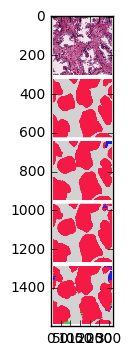

In [23]:
plt.imshow(np.vstack([img_, gt_, fcn_, segnet_, segnetb_]))

# WSI

In [51]:
annot_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/data/annotations/wsi_annotation/*.jpg'))
fcn_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/fcn8s/*RGB.png'))
full_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/segnet_full/*RGB.png'))
basic_list = sorted(glob.glob('/Users/nathaning/Dropbox/projects/semantic_pca/results/segnet_basic/*RGB.png'))

In [52]:
outpath = '/Users/nathaning/Dropbox/_Papers/pca segmentation/Figs/wsi/figs'
for annotp, fcnp, fullp, basicp in zip(
    annot_list, fcn_list, full_list, basic_list):

# annotp = annot_list[0]
# fcnp = fcn_list[0]
# fullp = full_list[0]
# basicp = basic_list[0]
    
    outname = os.path.basename(annotp)

    annot = cv2.imread(annotp)
    fcn = cv2.imread(fcnp)
    full = cv2.imread(fullp)
    basic = cv2.imread(basicp)

    targ_y = 600.
    x,y = annot.shape[:2]

    r = targ_y / y

    annot = cv2.resize(annot, dsize=(0,0), fx=r, fy=r)
    fcn = cv2.resize(fcn, dsize=(0,0), fx=r, fy=r, interpolation=cv2.INTER_NEAREST)
    full = cv2.resize(full, dsize=(0,0), fx=r, fy=r, interpolation=cv2.INTER_NEAREST)
    basic = cv2.resize(basic, dsize=(0,0), fx=r, fy=r, interpolation=cv2.INTER_NEAREST)

    annot_ = cv2.copyMakeBorder(annot,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    fcn_ = cv2.copyMakeBorder(fcn,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    full_ = cv2.copyMakeBorder(full,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))
    basic_ = cv2.copyMakeBorder(basic,10,10,10,10,cv2.BORDER_CONSTANT,value=(255,255,255))

    outimg = np.vstack([annot_, fcn_, full_, basic_])
    
    outname = os.path.join(outpath, outname)
    
    cv2.imwrite(outname, outimg)

#     plt.imshow(outimg)

In [40]:
y

2988

In [39]:
y_ratio

0.13386880856760375

In [35]:
print y, x

2988 1640
